# starting the notebook

## Imports

In [1]:
%matplotlib inline

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import copy
import operator

from sklearn.preprocessing import LabelEncoder,StandardScaler,OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.metrics import accuracy_score

In [2]:
# pd.set_option('display.max_rows', 999)
# pd.set_option('display.max_columns', 999)

In [4]:
?pd.option_context

## Functions 

In [3]:
def display_all(df):
    with pd.option_context("display.max_rows",1000, "display.max_columns",1000):
        display(df)

## Reading the data 

In [9]:
# # reading data through linux command
# !head Data_Train.xlsx

In [4]:
df_train = pd.read_excel('Data_Train.xlsx')
df_test = pd.read_excel("Data_Test.xlsx")

## Merging train and test data 

In [6]:
df_train.shape, df_test.shape

((11094, 9), (2774, 8))

In [7]:
full_df = pd.concat([df_train,df_test],axis=0,sort=False)

In [8]:
full_df.shape

(13868, 9)

In [9]:
full_df.isnull().sum()

Restaurant          0
Location            0
Cuisines            0
Average_Cost        0
Minimum_Order       0
Rating              0
Votes               0
Reviews             0
Delivery_Time    2774
dtype: int64

In [11]:
# full_df['Delivery_Time'].fillna(value = 0, axis = 0,inplace = True)

In [10]:
# full_df.isnull().sum()

In [ ]:
# df_train.iloc[11093]

In [ ]:
# df_test.iloc[0]

In [ ]:
# full_df.iloc[11094]

## Analyzing the data

In [123]:
df_train.groupby('Restaurant')['Delivery_Time'].value_counts()

Restaurant  Delivery_Time
ID_0        30 minutes       1
ID_1        30 minutes       1
ID_100      30 minutes       1
ID_1000     30 minutes       1
ID_1001     30 minutes       1
                            ..
ID_995      30 minutes       1
ID_996      45 minutes       2
ID_997      30 minutes       1
ID_998      65 minutes       1
ID_999      65 minutes       2
Name: Delivery_Time, Length: 7815, dtype: int64

In [17]:
df_test.shape

(2774, 8)

In [104]:
# rtrain = df_train[df_train['Restaurant'].isin(df_test['Restaurant'])]
# rtest = df_test[df_test['Restaurant'].isin(df_train['Restaurant'])]
# rtrain.to_csv('rtain.csv')
# rtest.to_csv('rtest.csv')
# del rtrain,rtest
# set(list(df_test[df_test['Restaurant'].isin(df_train['Restaurant'])]['Restaurant'])) < set(list(df_train[df_train['Restaurant'].isin(df_test['Restaurant'])]['Restaurant']))

In [125]:
full_df.head()

,Restaurant,Location,Cuisines,Average_Cost,Minimum_Order,Rating,Votes,Reviews,Delivery_Time
0,ID_6321,"FTI College, Law College Road, Pune","Fast Food, Rolls, Burger, Salad, Wraps",₹200,₹50,3.5,12,4,30 minutes
1,ID_2882,"Sector 3, Marathalli","Ice Cream, Desserts",₹100,₹50,3.5,11,4,30 minutes
2,ID_1595,Mumbai Central,"Italian, Street Food, Fast Food",₹150,₹50,3.6,99,30,65 minutes
3,ID_5929,"Sector 1, Noida","Mughlai, North Indian, Chinese",₹250,₹99,3.7,176,95,30 minutes
4,ID_6123,"Rmz Centennial, I Gate, Whitefield","Cafe, Beverages",₹200,₹99,3.2,521,235,65 minutes


In [126]:
full_df.shape

(13868, 9)

In [127]:
full_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13868 entries, 0 to 2773
Data columns (total 9 columns):
Restaurant       13868 non-null object
Location         13868 non-null object
Cuisines         13868 non-null object
Average_Cost     13868 non-null object
Minimum_Order    13868 non-null object
Rating           13868 non-null object
Votes            13868 non-null object
Reviews          13868 non-null object
Delivery_Time    11094 non-null object
dtypes: object(9)
memory usage: 1.1+ MB


In [129]:
full_df.describe(include = 'all')

,Restaurant,Location,Cuisines,Average_Cost,Minimum_Order,Rating,Votes,Reviews,Delivery_Time
count,13868,13868,13868,13868,13868,13868,13868,13868,11094
unique,8661,35,2392,26,20,33,1181,811,7
top,ID_5538,"Mico Layout, Stage 2, BTM Layout,Bangalore",North Indian,₹200,₹50,-,-,-,30 minutes
freq,26,1158,1076,4061,12674,1496,2616,2905,7406


In [6]:
full_df.isnull().sum()

Restaurant          0
Location            0
Cuisines            0
Average_Cost        0
Minimum_Order       0
Rating              0
Votes               0
Reviews             0
Delivery_Time    2774
dtype: int64

In [131]:
full_df['Delivery_Time'].value_counts()

30 minutes     7406
45 minutes     2665
65 minutes      923
120 minutes      62
20 minutes       20
80 minutes       14
10 minutes        4
Name: Delivery_Time, dtype: int64

In [140]:
full_df['Restaurant'].value_counts()

ID_5538    26
ID_7184    25
ID_2483    24
ID_7295    23
ID_1209    23
           ..
ID_6720     1
ID_7172     1
ID_250      1
ID_7522     1
ID_7268     1
Name: Restaurant, Length: 8661, dtype: int64

In [144]:
full_df[full_df['Restaurant'] == 'ID_7295']

,Restaurant,Location,Cuisines,Average_Cost,Minimum_Order,Rating,Votes,Reviews,Delivery_Time
349,ID_7295,"Noorkhan Bazaar, Malakpet, Hyderabad","Bakery, Desserts, Ice Cream",₹150,₹50,3.9,76,22,45 minutes
722,ID_7295,"Musi Nagar, Malakpet, Hyderabad","Bakery, Desserts, Ice Cream",₹150,₹50,3.9,76,22,45 minutes
1619,ID_7295,"Sector 63A,Gurgaon","Bakery, Desserts",₹150,₹50,3.7,45,30,45 minutes
2000,ID_7295,"Hyderabad Public School, Begumpet","Bakery, Desserts, Ice Cream",₹150,₹50,3.9,58,30,45 minutes
4286,ID_7295,"Delhi High Court, India Gate","Bakery, Desserts",₹150,₹50,4.0,90,60,45 minutes
4360,ID_7295,"Nathan Road, Mangaldas Road, Pune","Bakery, Desserts, Ice Cream",₹150,₹50,4.1,58,39,45 minutes
4482,ID_7295,"D-Block, Sector 63, Noida","Bakery, Desserts",₹150,₹50,3.8,51,27,45 minutes
5151,ID_7295,"Sector 14, Noida","Bakery, Desserts",₹150,₹50,3.9,90,53,45 minutes
5321,ID_7295,"Jaya Nagar, Saidabad, Hyderabad","Bakery, Desserts, Ice Cream",₹150,₹50,-,-,-,30 minutes
5682,ID_7295,"Panjetan Colony, Malakpet, Hyderabad","Bakery, Desserts, Ice Cream",₹150,₹50,3.9,76,22,45 minutes


## copying data

In [7]:
# to copy both train and test data
dfc = copy.copy(full_df)

In [ ]:
# to copy only train data
# dfc = copy.copy(df_train)

## feature preprocessing

In [8]:
dfc.head()

,Restaurant,Location,Cuisines,Average_Cost,Minimum_Order,Rating,Votes,Reviews,Delivery_Time
0,ID_6321,"FTI College, Law College Road, Pune","Fast Food, Rolls, Burger, Salad, Wraps",₹200,₹50,3.5,12,4,30 minutes
1,ID_2882,"Sector 3, Marathalli","Ice Cream, Desserts",₹100,₹50,3.5,11,4,30 minutes
2,ID_1595,Mumbai Central,"Italian, Street Food, Fast Food",₹150,₹50,3.6,99,30,65 minutes
3,ID_5929,"Sector 1, Noida","Mughlai, North Indian, Chinese",₹250,₹99,3.7,176,95,30 minutes
4,ID_6123,"Rmz Centennial, I Gate, Whitefield","Cafe, Beverages",₹200,₹99,3.2,521,235,65 minutes


In [8]:
city_name_dict = {'Pune':'Pune',
                  'Marathalli':'Bangalore',
                  'Mumbai Central':'Mumbai',
                  'Noida':'Noida',
                  'Whitefield':'Bangalore',
                  'Delhi University-GTB Nagar':'Delhi',
                  'Maharashtra':'Pune',
                  'Timarpur':'Delhi',
                  'Kolkata':'Kolkata',
                  'Mumbai CST Area':'Mumbai',
                  'Pune University':'Pune',
                  'Bangalore':'Bangalore',
                  'Gurgoan':'Gurgoan',
                  'Gurgaon':'Gurgoan',
                  'Begumpet':'Hyderabad',
                  'Majestic':'Bangalore',
                  'India Gate':'Delhi',
                  'Hyderabad':'Hyderabad',
                  'Delhi Cantt.':'Delhi',
                  'Mumbai':'Mumbai',
                  'Delhi':'Delhi',
                  'Electronic City':'Bangalore' 
                  }

In [ ]:
# len(city_name_dict)

In [188]:
# dfc['Location'].str.split(',').str[-1].nunique()

In [ ]:
# to see first n elements of a dictionary
# for k,v in sorted(city_name_dict.items(), key = operator.itemgetter(1))[:5]:
#     print(k,v)

In [176]:
# # NoN Vectorizer method for creating city_name columns
# # for creating city_name columns in dataframe
# # %prun
# for index,elem in enumerate(dfc['Location'].str.split(',').str[-1]):
#     elem = elem.strip()
#     if elem in city_name_dict.keys():
#         dfc['City_Name'].iloc[index] = city_name_dict[elem]

In [190]:
# # vectoriz method for creating City_Name columns
# dfc['Location'].str.split(',').str[-1].apply(lambda x: city_name_dict[x.strip()])

In [9]:
dfc.insert(loc = 2,column = 'City_Name', value = dfc['Location'].str.split(',').str[-1].apply(lambda x: city_name_dict[x.strip()]))
dfc.columns

Index(['Restaurant', 'Location', 'City_Name', 'Cuisines', 'Average_Cost',
       'Minimum_Order', 'Rating', 'Votes', 'Reviews', 'Delivery_Time'],
      dtype='object')

In [11]:
dfc.head()

,Restaurant,Location,City_Name,Cuisines,Average_Cost,Minimum_Order,Rating,Votes,Reviews,Delivery_Time
0,ID_6321,"FTI College, Law College Road, Pune",Pune,"Fast Food, Rolls, Burger, Salad, Wraps",₹200,₹50,3.5,12,4,30 minutes
1,ID_2882,"Sector 3, Marathalli",Bangalore,"Ice Cream, Desserts",₹100,₹50,3.5,11,4,30 minutes
2,ID_1595,Mumbai Central,Mumbai,"Italian, Street Food, Fast Food",₹150,₹50,3.6,99,30,65 minutes
3,ID_5929,"Sector 1, Noida",Noida,"Mughlai, North Indian, Chinese",₹250,₹99,3.7,176,95,30 minutes
4,ID_6123,"Rmz Centennial, I Gate, Whitefield",Bangalore,"Cafe, Beverages",₹200,₹99,3.2,521,235,65 minutes


In [12]:
dfc['City_Name'].unique()

array(['Pune', 'Bangalore', 'Mumbai', 'Noida', 'Delhi', 'Kolkata',
       'Gurgoan', 'Hyderabad'], dtype=object)

In [10]:
def zone_dic(value):
    if value in ['Pune', 'Bangalore', 'Mumbai','Hyderabad']:
        return 'South'
    elif value in ['Noida', 'Delhi', 'Kolkata','Gurgoan']:
        return 'North'
    else:
        return 'Other'

In [11]:
dfc.insert(loc = 3, column = 'Zone',value = dfc['City_Name'].apply(lambda row: zone_dic(row)))
dfc.head(2)

,Restaurant,Location,City_Name,Zone,Cuisines,Average_Cost,Minimum_Order,Rating,Votes,Reviews,Delivery_Time
0,ID_6321,"FTI College, Law College Road, Pune",Pune,South,"Fast Food, Rolls, Burger, Salad, Wraps",₹200,₹50,3.5,12,4,30 minutes
1,ID_2882,"Sector 3, Marathalli",Bangalore,South,"Ice Cream, Desserts",₹100,₹50,3.5,11,4,30 minutes


In [12]:
# creating no.of cuisiness columns
dfc.insert(loc = 5,column = 'No.of Cuisines',value = dfc['Cuisines'].str.split(',').map(len))
# dfc['No.of Cuisines'] = dfc['Cuisines'].str.split(',').map(len)

In [200]:
dfc.head(1)

,Restaurant,Location,City_Name,Zone,No.of Cuisines,Cuisines,Average_Cost,Minimum_Order,Rating,Votes,Reviews,Delivery_Time
0,ID_6321,"FTI College, Law College Road, Pune",Pune,South,5,"Fast Food, Rolls, Burger, Salad, Wraps",₹200,₹50,3.5,12,4,30 minutes


In [204]:
# reindexing the columns
list(dfc.columns.values)
# changing the order of prefereces
['Restaurant',
 'Location',
 'City_Name',
 'Zone',
 'Cuisines',
 'No.of Cuisines',
 'Average_Cost',
 'Minimum_Order',
 'Rating',
 'Votes',
 'Reviews',
 'Delivery_Time']
# assigning to the dataframe
dfc = dfc[['Restaurant',
 'Location',
 'City_Name',
 'Zone',
 'Cuisines',
 'No.of Cuisines',
 'Average_Cost',
 'Minimum_Order',
 'Rating',
 'Votes',
 'Reviews',
 'Delivery_Time']]

['Restaurant',
 'Location',
 'City_Name',
 'Zone',
 'No.of Cuisines',
 'Cuisines',
 'Average_Cost',
 'Minimum_Order',
 'Rating',
 'Votes',
 'Reviews',
 'Delivery_Time']

In [207]:
dfc.head(1)

,Restaurant,Location,City_Name,Zone,Cuisines,No.of Cuisines,Average_Cost,Minimum_Order,Rating,Votes,Reviews,Delivery_Time
0,ID_6321,"FTI College, Law College Road, Pune",Pune,South,"Fast Food, Rolls, Burger, Salad, Wraps",5,₹200,₹50,3.5,12,4,30 minutes


In [210]:
# dfc.isnull().sum()

## target encoding

In [211]:
dfc.head()

,Restaurant,Location,City_Name,Zone,Cuisines,No.of Cuisines,Average_Cost,Minimum_Order,Rating,Votes,Reviews,Delivery_Time
0,ID_6321,"FTI College, Law College Road, Pune",Pune,South,"Fast Food, Rolls, Burger, Salad, Wraps",5,₹200,₹50,3.5,12,4,30 minutes
1,ID_2882,"Sector 3, Marathalli",Bangalore,South,"Ice Cream, Desserts",2,₹100,₹50,3.5,11,4,30 minutes
2,ID_1595,Mumbai Central,Mumbai,South,"Italian, Street Food, Fast Food",3,₹150,₹50,3.6,99,30,65 minutes
3,ID_5929,"Sector 1, Noida",Noida,North,"Mughlai, North Indian, Chinese",3,₹250,₹99,3.7,176,95,30 minutes
4,ID_6123,"Rmz Centennial, I Gate, Whitefield",Bangalore,South,"Cafe, Beverages",2,₹200,₹99,3.2,521,235,65 minutes


In [53]:
# dict(zip(list(dfc['Delivery_Time'].unique())[:-1],list(range(1,dfc['Delivery_Time'].nunique()+1))))

{'30 minutes': 1,
 '65 minutes': 2,
 '45 minutes': 3,
 '10 minutes': 4,
 '20 minutes': 5,
 '120 minutes': 6,
 '80 minutes': 7}

In [13]:
%time
dfc['target_encoding'] = ''

# tl = list(dict(dfc['Delivery_Time'].value_counts()).keys())
# tar_dic = {'10 minutes':1,
#            '20 minutes':2,
#            '30 minutes':3,
#            '45 minutes':4,
#            '65 minutes':5,
#            '80 minutes':6,
#            '120 minutes':7}
tar_dic = dict(zip(list(dfc['Delivery_Time'].unique())[:-1],list(range(1,dfc['Delivery_Time'].nunique()+1))))
for index,value in enumerate(dfc['Delivery_Time']):
    if value in list(dfc['Delivery_Time'].unique())[:-1]:
        dfc['target_encoding'].iloc[index] = tar_dic[value]
dfc['target_encoding'] = pd.to_numeric(dfc['target_encoding'])

CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 6.2 µs


/home/vishal.s@idexcel.internal/anaconda3/envs/hack/lib/python3.7/site-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [17]:
dfc.head(2)

,Restaurant,Location,City_Name,Zone,Cuisines,No.of Cuisines,Average_Cost,Minimum_Order,Rating,Votes,Reviews,Delivery_Time,target_encoding
0,ID_6321,"FTI College, Law College Road, Pune",Pune,South,"Fast Food, Rolls, Burger, Salad, Wraps",5,₹200,₹50,3.5,12,4,30 minutes,1.0
1,ID_2882,"Sector 3, Marathalli",Bangalore,South,"Ice Cream, Desserts",2,₹100,₹50,3.5,11,4,30 minutes,1.0


In [105]:
# # groupby using condition on columns value
# dfc['target_encoding'].groupby(dfc['City_Name'] =='Pune').value_counts()

In [108]:
# dfc[dfc['City_Name'] == 'Pune']['target_encoding'].sum()

In [14]:
%time
dfc.insert(loc = 11,column = 'mean',value = '')
dfc.insert(loc = 12,column = 'median',value = '')
dfc.insert(loc = 13,column = 'std',value = '')
dfc.insert(loc = 14,column = 'min',value = '')
dfc.insert(loc = 15,column = 'max',value = '')
# dfc['mean'],dfc['median'],dfc['std'],dfc['min'],dfc['max'] = '','','','',''
tmean = dict(dfc.groupby('City_Name')['target_encoding'].mean())
tmedian = dict(dfc.groupby('City_Name')['target_encoding'].median())
tstd = dict(dfc.groupby('City_Name')['target_encoding'].std())
tmin = dict(dfc.groupby('City_Name')['target_encoding'].min())
tmax = dict(dfc.groupby('City_Name')['target_encoding'].max())
# tsum = dfc.groupby('City_Name')['target_encoding'].sum()

for index,value in enumerate(dfc['City_Name']):
    dfc['mean'].iloc[index] = tmean[value]
    dfc['median'].iloc[index] = tmedian[value]
    dfc['std'].iloc[index] = tstd[value]
    dfc['min'].iloc[index] = tmin[value]
    dfc['max'].iloc[index] = tmax[value]
dfc['mean'] = pd.to_numeric(dfc['mean'])
dfc['std'] = pd.to_numeric(dfc['std'])

CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 5.01 µs


In [19]:
dfc.dtypes

Restaurant          object
Location            object
City_Name           object
Zone                object
Cuisines            object
No.of Cuisines       int64
Average_Cost        object
Minimum_Order       object
Rating              object
Votes               object
Reviews             object
mean               float64
median               int64
std                float64
min                  int64
max                  int64
Delivery_Time       object
target_encoding    float64
dtype: object

In [29]:
# dfc

In [13]:
dfc_copy1 = copy.deepcopy(dfc)

In [ ]:
# l = dfc['City_Name'].unique()
# for index,rows in enumerate(dfc['City_Name']):
# #     print(index,rows)
#     if rows in l:
#         dfc['mean'].iloc[index] = pd.to_numeric(dfc[dfc['City_Name'] == rows]['target_encoding']).mean()
#         dfc['median'].iloc[index] = pd.to_numeric(dfc[dfc['City_Name'] == rows]['target_encoding']).median()
#         dfc['std'].iloc[index] = pd.to_numeric(dfc[dfc['City_Name'] == rows]['target_encoding']).std()
#         dfc['min'].iloc[index] = pd.to_numeric(dfc[dfc['City_Name'] == rows]['target_encoding']).min()
#         dfc['max'].iloc[index] = pd.to_numeric(dfc[dfc['City_Name'] == rows]['target_encoding']).max()
# #     dfc.iloc[index]
    
# #     break
# # pd.to_numeric(dfc[dfc['City_Name'] == 'Pune']['target_encoding']).mean()

In [ ]:
# dfc.groupby('City_Name')['target_encoding'].max()

# dfc[dfc['City_Name'] == 'Bangalore']['sum'] =dfc[dfc['City_Name'] == 'Bangalore']['target_encoding'].sum()

# dfc.loc[dfc['City_Name']=='Bangalore','std'] = dfc[dfc['City_Name'] == 'Bangalore']['target_encoding'].std()
# dfc.loc[dfc['City_Name']=='Delhi','std'] = dfc[dfc['City_Name'] == 'Delhi']['target_encoding'].std()
# dfc.loc[dfc['City_Name']=='Gurgoan','std'] = dfc[dfc['City_Name'] == 'Gurgoan']['target_encoding'].std()
# dfc.loc[dfc['City_Name']=='Hyderabad','std'] = dfc[dfc['City_Name'] == 'Hyderabad']['target_encoding'].std()
# dfc.loc[dfc['City_Name']=='Kolkata','std'] = dfc[dfc['City_Name'] == 'Kolkata']['target_encoding'].std()
# dfc.loc[dfc['City_Name']=='Mumbai','std'] = dfc[dfc['City_Name'] == 'Mumbai']['target_encoding'].std()
# dfc.loc[dfc['City_Name']=='Noida','std'] = dfc[dfc['City_Name'] == 'Noida']['target_encoding'].std()
# dfc.loc[dfc['City_Name']=='Pune','std'] = dfc[dfc['City_Name'] == 'Pune']['target_encoding'].std()

# # dfc.to_csv('min.csv')

# dfc[dfc['City_Name'] == 'Bangalore']['target_encoding'].sum()

In [25]:
dfc.to_csv('till_target.csv',index = True)

In [61]:
dfc = pd.read_csv('till_target.csv',index_col =0)

In [62]:
dfc.head()

,Restaurant,Location,City_Name,Zone,Cuisines,No.of Cuisines,Average_Cost,Minimum_Order,Rating,Votes,Reviews,mean,median,std,min,max,Delivery_Time,target_encoding
0,ID_6321,"FTI College, Law College Road, Pune",Pune,South,"Fast Food, Rolls, Burger, Salad, Wraps",5,₹200,₹50,3.5,12,4,1.576428,1,0.927440,1,7,30 minutes,1.0
1,ID_2882,"Sector 3, Marathalli",Bangalore,South,"Ice Cream, Desserts",2,₹100,₹50,3.5,11,4,1.619003,1,0.934412,1,6,30 minutes,1.0
2,ID_1595,Mumbai Central,Mumbai,South,"Italian, Street Food, Fast Food",3,₹150,₹50,3.6,99,30,1.728234,1,1.036480,1,7,65 minutes,2.0
3,ID_5929,"Sector 1, Noida",Noida,North,"Mughlai, North Indian, Chinese",3,₹250,₹99,3.7,176,95,1.626558,1,0.968593,1,7,30 minutes,1.0
4,ID_6123,"Rmz Centennial, I Gate, Whitefield",Bangalore,South,"Cafe, Beverages",2,₹200,₹99,3.2,521,235,1.619003,1,0.934412,1,6,65 minutes,2.0


## cleaning the data

In [63]:
# replacing rupee symbol
dfc['Average_Cost'] = dfc['Average_Cost'].str.replace(r'\u20B9','')
dfc['Minimum_Order'] = dfc['Minimum_Order'].str.replace(r'\u20B9','')

In [36]:
dfc['Average_Cost'].unique()

array(['200', '100', '150', '250', '650', '350', '800', '50', '400',
       '600', '300', '750', '450', '550', '1,000', '500', '900', '1,200',
       '950', '850', '700', '1,150', 'for', '1,100', '1,400', '2,050'],
      dtype=object)

In [37]:
dfc[dfc['Average_Cost'] =='for']

,Restaurant,Location,City_Name,Zone,Cuisines,No.of Cuisines,Average_Cost,Minimum_Order,Rating,Votes,Reviews,mean,median,std,min,max,Delivery_Time,target_encoding
6297,ID_6472,Pune University,Pune,South,Fast Food,1,for,50,NEW,-,-,1.576428,1,0.92744,1,7,30 minutes,1.0


In [38]:
dfc[dfc['Restaurant'] == 'ID_6472']

,Restaurant,Location,City_Name,Zone,Cuisines,No.of Cuisines,Average_Cost,Minimum_Order,Rating,Votes,Reviews,mean,median,std,min,max,Delivery_Time,target_encoding
5988,ID_6472,"D-Block, Sector 63, Noida",Noida,North,Fast Food,1,200,99,3.7,1056,329,1.626558,1,0.968593,1,7,65 minutes,2.0
6297,ID_6472,Pune University,Pune,South,Fast Food,1,for,50,NEW,-,-,1.576428,1,0.927440,1,7,30 minutes,1.0


In [39]:
dfc[(dfc['Minimum_Order'] == '50') & (dfc['Average_Cost'] == '200') & (dfc['Rating'] =='NEW')].head(50)

,Restaurant,Location,City_Name,Zone,Cuisines,No.of Cuisines,Average_Cost,Minimum_Order,Rating,Votes,Reviews,mean,median,std,min,max,Delivery_Time,target_encoding
47,ID_2809,"Mico Layout, Stage 2, BTM Layout,Bangalore",Bangalore,South,Chinese,1,200,50,NEW,-,-,1.619003,1,0.934412,1,6,30 minutes,1.0
85,ID_7520,"Sector 1, Noida",Noida,North,"North Indian, Chinese",2,200,50,NEW,-,-,1.626558,1,0.968593,1,7,45 minutes,3.0
93,ID_7738,"Rmz Centennial, I Gate, Whitefield",Bangalore,South,"Continental, Beverages, Desserts",3,200,50,NEW,-,-,1.619003,1,0.934412,1,6,30 minutes,1.0
106,ID_1858,"Tejas Nagar Colony, Wadala West, Mumbai",Mumbai,South,"North Indian, South Indian, Assamese, Maharash...",5,200,50,NEW,-,-,1.728234,1,1.036480,1,7,30 minutes,1.0
159,ID_8391,"Sector 1, Noida",Noida,North,"Cafe, Desserts",2,200,50,NEW,-,-,1.626558,1,0.968593,1,7,30 minutes,1.0
210,ID_7594,Mumbai Central,Mumbai,South,Burger,1,200,50,NEW,-,-,1.728234,1,1.036480,1,7,30 minutes,1.0
248,ID_7266,"Laxman Vihar Industrial Area, Sector 3A, Gurgoan",Gurgoan,North,"North Indian, Fast Food, Chinese",3,200,50,NEW,-,-,1.589641,1,0.990781,1,7,30 minutes,1.0
345,ID_911,"Laxman Vihar Industrial Area, Sector 3A, Gurgoan",Gurgoan,North,Biryani,1,200,50,NEW,-,-,1.589641,1,0.990781,1,7,30 minutes,1.0
456,ID_7170,"FTI College, Law College Road, Pune",Pune,South,"European, Italian, Pizza, Fast Food",4,200,50,NEW,-,-,1.576428,1,0.927440,1,7,30 minutes,1.0
483,ID_4691,"Sector 14, Noida",Noida,North,"North Indian, Chinese",2,200,50,NEW,-,-,1.626558,1,0.968593,1,7,30 minutes,1.0


In [64]:
# dfc['Average_Cost'].unique()

dfc[dfc['Average_Cost'] =='for']
dfc['Average_Cost'] = dfc['Average_Cost'].str.replace(r',','')
# by looking the data, replaced with "200"
dfc.loc[dfc['Average_Cost'] == 'for','Average_Cost'] = '200'
# dfc.loc[dfc['Average_Cost'] == 'for','Average_Cost'] = pd.to_numeric(dfc[(dfc['Minimum_Order'] == '50') & (dfc['Average_Cost'] != 'for')]['Average_Cost']).mean()
dfc['Average_Cost'] = pd.to_numeric(dfc['Average_Cost'])

In [65]:
dfc['Minimum_Order'].unique()

dfc[dfc['Minimum_Order'] == '0']

dfc['Minimum_Order'].unique()
dfc.loc[dfc['Minimum_Order'] =='0','Minimum_Order'] = '50'
dfc['Minimum_Order'] = pd.to_numeric(dfc['Minimum_Order'])

In [325]:
# dfc['Minimum_Order'].dtypes

dtype('int64')

In [66]:
dfc['Rating'].unique()

# checking for '-' value
dfc[dfc['Rating'] == '-']['Minimum_Order'].value_counts()
# substituting '-' with median value of Minimum_order of 50 
dfc.loc[((dfc['Rating'] == '-') & (dfc['Minimum_Order'] == 50)), 'Rating'] = str(pd.to_numeric(dfc[(dfc['Minimum_Order'] == 50) & (~dfc['Rating'].isin(['-','NEW','Opening Soon','Temporarily Closed']))]['Rating']).median())
# substituting '-' with median value of Minimum_order of 99 and 299
dfc.loc[((dfc['Rating'] == '-') & (dfc['Minimum_Order'].isin([99,299]))), 'Rating'] = str(pd.to_numeric(dfc[(dfc['Minimum_Order'].isin([99,299])) & (~dfc['Rating'].isin(['-','NEW','Opening Soon','Temporarily Closed']))]['Rating']).median())

# checking for "NEW" value
dfc[dfc['Rating'] == 'NEW']['Minimum_Order'].value_counts()
# substituting "NEW" with median value of Minimum_Order of 50
dfc.loc[((dfc['Rating'] == 'NEW') & (dfc['Minimum_Order'] == 50)), 'Rating'] = str(dfc[(dfc['Minimum_Order'] == 50) & (~dfc['Rating'].isin(['NEW','Opening Soon','Temporarily Closed']))]['Rating'].median())

# checking for "Temporarily Closed" and 'Opening Soon'
dfc[dfc['Rating'].isin(['Temporarily Closed','Opening Soon'])]['Minimum_Order'].value_counts()
# substituting "Temporarily Closed" and 'Opening Soon' with median value of Minimum order of 50
dfc.loc[((dfc['Rating'].isin(['Temporarily Closed','Opening Soon'])) & (dfc['Minimum_Order'] == 50)),'Rating']= str(dfc[((dfc['Minimum_Order'] == 50) & (~dfc['Rating'].isin(['Temporarily Closed','Opening Soon'])))]['Rating'].median())

# Old Approach
# dfc['Rating'].unique()
# mean_value = pd.to_numeric(dfc.loc[~dfc['Rating'].isin(['Temporarily Closed','Opening Soon','NEW','-'])]['Rating']).mean()

# dfc.loc[dfc['Rating'].isin(['Temporarily Closed','NEW','-']), 'Rating'] = round(mean_value, 2)

# dfc.loc[dfc['Rating'] == 'Opening Soon', 'Rating'] = 2.5

dfc['Rating'] = pd.to_numeric(dfc['Rating'])

(array([  11.,  102.,  552., 1538., 1731., 5590., 2748., 1215.,  315.,
          66.]),
 array([2.1 , 2.38, 2.66, 2.94, 3.22, 3.5 , 3.78, 4.06, 4.34, 4.62, 4.9 ]),
 <a list of 10 Patch objects>)

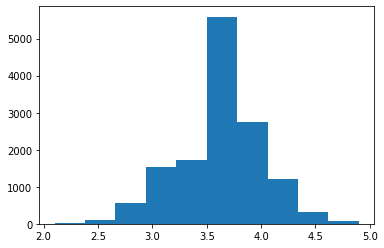

In [74]:
plt.hist(dfc['Rating'])

In [67]:
dfc['Votes'].unique()

for i in list(dict(dfc[dfc['Votes'] == '-']['Rating'].value_counts()).keys()):
    dfc.loc[((dfc['Votes'] =='-') & (dfc['Rating'] == i)), 'Votes']= str(int((pd.to_numeric(dfc[(dfc['Rating'] == i) & (dfc['Votes']!='-')]['Votes'])).mean()))

# old Approcah
# dfc['Votes'] = dfc['Votes'].str.replace(r'-','0')

dfc['Votes'] = pd.to_numeric(dfc['Votes'])

In [68]:
dfc['Reviews'].unique()
dfc['Reviews'].value_counts()

for i in list(dict(dfc[dfc['Reviews'] == '-']['Rating'].value_counts()).keys()):
    dfc.loc[((dfc['Reviews'] == '-') & (dfc['Rating']==i)), 'Reviews'] = str(int(pd.to_numeric(dfc[(dfc['Rating'] ==3.6) & (dfc['Reviews'] != '-')]['Reviews']).mean()))

# Old Approach
# dfc['Reviews'] = dfc['Reviews'].str.replace(r'-','0')

dfc['Reviews'] = pd.to_numeric(dfc['Reviews'])

In [205]:
# dfc.dtypes

## creating new features

In [210]:
dfc.head(2)

,Restaurant,Location,City_Name,Zone,Cuisines,No.of Cuisines,Average_Cost,Minimum_Order,Rating,Votes,Reviews,mean,median,std,min,max,Delivery_Time,target_encoding
0,ID_6321,"FTI College, Law College Road, Pune",Pune,South,"Fast Food, Rolls, Burger, Salad, Wraps",5,200,50,3.5,12,4,1.576428,1,0.927440,1,7,30 minutes,1.0
1,ID_2882,"Sector 3, Marathalli",Bangalore,South,"Ice Cream, Desserts",2,100,50,3.5,11,4,1.619003,1,0.934412,1,6,30 minutes,1.0


In [47]:
# dfc.iloc[:,5:10].values

In [ ]:
# ss_df = copy.copy(dfc.iloc[:,5:])

In [69]:
dfc.iloc[:,6:11]

,Average_Cost,Minimum_Order,Rating,Votes,Reviews
0,200,50,3.5,12,4
1,100,50,3.5,11,4
2,150,50,3.6,99,30
3,250,99,3.7,176,95
4,200,99,3.2,521,235
...,...,...,...,...,...
2769,100,50,3.6,93,36
2770,250,50,3.1,5,1
2771,150,50,3.0,16,1
2772,100,99,3.0,7,2


In [70]:
# Normalizing the feature from Average_cost to Reviews
ss = StandardScaler()
dfc.iloc[:,6:11] = ss.fit_transform(dfc.iloc[:,6:11].values)

In [21]:
# from sklearn.preprocessing import MinMaxScaler
# scaler = MinMaxScaler(feature_range = (0,1))
# dfc.iloc[:,5:10] = scaler.fit_transform(dfc.iloc[:,5:10].values)

In [45]:
# dfc.head()

In [71]:
# labelencoder for restaurant feature
le = LabelEncoder()
dfc['Restaurant'] = le.fit_transform(dfc['Restaurant'])

In [215]:
dfc.head(1)

,Restaurant,Location,City_Name,Zone,Cuisines,No.of Cuisines,Average_Cost,Minimum_Order,Rating,Votes,Reviews,mean,median,std,min,max,Delivery_Time,target_encoding
0,5915,"FTI College, Law College Road, Pune",Pune,South,"Fast Food, Rolls, Burger, Salad, Wraps",5,200,50,3.5,12,4,1.576428,1,0.92744,1,7,30 minutes,1.0


In [222]:
pd.get_dummies(dfc.iloc[:,1:4],dtype=int)

,"Location_BTM Layout 1, Electronic City","Location_Babarpur, New Delhi, Delhi","Location_Chandni Chowk, Kolkata","Location_Chatta Bazaar, Malakpet, Hyderabad","Location_D-Block, Sector 63, Noida","Location_Delhi Administration Flats, Timarpur",Location_Delhi Cantt.,"Location_Delhi High Court, India Gate",Location_Delhi University-GTB Nagar,"Location_Dockyard Road, Mumbai CST Area",...,City_Name_Bangalore,City_Name_Delhi,City_Name_Gurgoan,City_Name_Hyderabad,City_Name_Kolkata,City_Name_Mumbai,City_Name_Noida,City_Name_Pune,Zone_North,Zone_South
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
1,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
4,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2769,0,0,0,0,0,0,0,0,1,0,...,0,1,0,0,0,0,0,0,1,0
2770,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
2771,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
2772,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0


In [72]:
# using Location columns generating new features
place_df = pd.get_dummies(dfc.iloc[:,1:4],dtype=int)
# # Old Approach
# loc_df = pd.get_dummies(dfc['Location'],dtype=int)
# city_df = pd.get_dummies(dfc['City_Name'],dtype=int)
# loc_city_df = pd.concat([loc_df,city_df],axis =1,sort=False)
# loc_city_df.shape
dfc.drop(['Location','City_Name','Zone'],axis = 1,inplace = True)
dfc.head(2)

,Restaurant,Cuisines,No.of Cuisines,Average_Cost,Minimum_Order,Rating,Votes,Reviews,mean,median,std,min,max,Delivery_Time,target_encoding
0,5915,"Fast Food, Rolls, Burger, Salad, Wraps",5,-0.009799,-0.229534,-0.292028,-0.407021,-0.35058,1.576428,1,0.927440,1,7,30 minutes,1.0
1,2093,"Ice Cream, Desserts",2,-0.797563,-0.229534,-0.292028,-0.409026,-0.35058,1.619003,1,0.934412,1,6,30 minutes,1.0


In [56]:
# loc_city_df

In [73]:
# transforming Cuisines into features
%time
new_df = pd.DataFrame(index = dfc.index,columns = list(set([elem.lstrip() for elem in list(set(sum(dfc['Cuisines'].str.split(',').tolist(),[])))])))
l = new_df.columns.tolist()
for index,rows in enumerate(dfc['Cuisines']):
    len_of_each_rows = len(rows.split(','))
    count = 0
    for elem in rows.split(','):
        elem = elem.lstrip()
        if elem in l:
            new_df[elem].iloc[index] = 1
            count +=1
            if count == len_of_each_rows:
                break
new_df.fillna(0,inplace = True)
new_df.head()

CPU times: user 5 µs, sys: 0 ns, total: 5 µs
Wall time: 7.87 µs


,Ice Cream,Bihari,BBQ,North Eastern,Momos,Beverages,Iranian,Vietnamese,Tibetan,Thai,...,Spanish,North Indian,Naga,Cantonese,Chinese,Kerala,Brazilian,Mishti,American,Mithai
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,1,0,0,0,0,0
4,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [59]:
# new_df.dtypes

In [75]:
new_df.shape

(13868, 101)

In [74]:
place_df.shape

(13868, 45)

In [76]:
dfc.shape

(13868, 15)

In [77]:
loc_city_cui_df = pd.concat([place_df,new_df],axis =1,sort = False)

In [78]:
loc_city_cui_df.shape

(13868, 146)

In [ ]:
dfc.head()

In [79]:
loc_city_cui_df.insert(loc = 0, column='Restaurant',value=dfc.iloc[:,0:1],allow_duplicates=False)

In [80]:
loc_city_cui_df.shape

(13868, 147)

In [238]:
# loc_city_cui_df.head(1)

In [243]:
# dfc.head(1)

In [81]:
final_df = pd.concat([loc_city_cui_df,dfc.iloc[:,2:]],axis = 1,sort = False)

In [82]:
final_df.shape

(13868, 160)

In [83]:
final_df.drop('target_encoding',axis=1,inplace = True)

In [247]:
# list(final_df.isnull().sum())

In [84]:
final_df.to_csv('final_df.csv',index = True)

In [2]:
import pandas as pd

In [11]:
final_df = pd.read_csv('final_df.csv',index_col=0)

/home/vishal.s@idexcel.internal/anaconda3/envs/hack/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3051: DtypeWarning: Columns (159) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


## Spliting the data

In [ ]:
# spliting the data into three part:- train,valid,test

In [4]:
final_df.shape

(13868, 159)

In [12]:
train_df = final_df.iloc[:11094,:]
test_df = final_df.iloc[11094:,:]
train_df.shape, test_df.shape

((11094, 159), (2774, 159))

In [15]:
X_train, X_test, y_train, y_test = train_test_split(
                                     train_df.iloc[:,:-1],
                                     train_df.iloc[:,-1:],
                                     test_size=0.2,
                                     random_state=100,
                                     stratify=train_df.iloc[:,-1:])

In [16]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((8875, 158), (8875, 1), (2219, 158), (2219, 1))

# Training the model 

## Random Forest Classifier

In [91]:
clf = RandomForestClassifier(n_estimators = 1500, max_features=49 )
%time clf.fit(X_train,y_train)
accuracy_score(y_test,clf.predict(X_test))

/home/vishal.s@idexcel.internal/anaconda3/envs/hack/lib/python3.7/site-packages/ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


CPU times: user 51.7 s, sys: 47.4 ms, total: 51.7 s
Wall time: 51.7 s


0.8197386210004507

In [96]:
clf = RandomForestClassifier(n_estimators=2000,min_samples_leaf=1,max_features=40, bootstrap =False)
%time clf.fit(X_train,y_train)
accuracy_score(y_test,clf.predict(X_test))

/home/vishal.s@idexcel.internal/anaconda3/envs/hack/lib/python3.7/site-packages/ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


CPU times: user 1min 28s, sys: 223 ms, total: 1min 28s
Wall time: 1min 28s


0.8260477692654349

In [37]:
# without splitting the data
# clf.fit(train_df.iloc[:,:-1],train_df.iloc[:,-1:])

/home/vishal.s@idexcel.internal/anaconda3/envs/hack/lib/python3.7/site-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features=35, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=1000,
                       n_jobs=4, oob_score=False, random_state=None, verbose=0,
                       warm_start=False)

## Extra 

In [35]:
from sklearn.ensemble import ExtraTreesClassifier

In [53]:
elf = ExtraTreesClassifier(n_estimators=1300, max_features=50,min_samples_split=2,random_state=0)
elf.fit(X_train, y_train)
accuracy_score(y_test,elf.predict(X_test))

/home/vishal.s@idexcel.internal/anaconda3/envs/hack/lib/python3.7/site-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


0.8107255520504731

In [56]:
(clf.predict(X_test)+elf.predict(X_test))

array(['65 minutes65 minutes', '30 minutes30 minutes',
       '45 minutes30 minutes', ..., '30 minutes30 minutes',
       '30 minutes30 minutes', '30 minutes30 minutes'], dtype=object)

## LightGBM

In [13]:
import lightgbm as lgb

In [74]:
x = X_train.values

In [75]:
y = y_train['Delivery_Time'].str.split(' ').str[0].values

In [77]:
len(y)

8875

In [18]:
# y = y_train.values

In [78]:
x_trainl, x_testl, y_trainl, y_testl = train_test_split(x, y, test_size=0.2, random_state=42, stratify=y)


In [81]:
d_train = lgb.Dataset(x_trainl, label=y_trainl)
params = {}
params['learning_rate'] = 0.003
params['boosting_type'] = 'gbdt'
params['objective'] = 'multiclass'
params['metric'] = 'multi_logloss'
params['num_class'] = 6
params['sub_feature'] = 0.5
params['num_leaves'] = 10
params['min_data'] = 50
params['max_depth'] = 10

In [82]:
llf = lgb.train(params, d_train, 100)

LightGBMError: Label must be in [0, 6), but found 30 in label

In [67]:
np.unique(y,return_counts = True)

(array(['10', '120', '20', '30', '45', '65', '80'], dtype=object),
 array([   2,   40,   13, 4740, 1706,  590,    9]))

In [20]:
categorical_features = [c for c, col in enumerate(X_train.columns) if 'cat' in col]

In [23]:
for c,col in enumerate(X_train.columns):
    if 'cat' in col:
        print(c, col)
        break
    

1 Location_BTM Layout 1, Electronic City


In [28]:
train_data = lgb.Dataset(x, label=y)
test_data = lgb.Dataset(x_test, label=y_test)

In [29]:
parameters = {
    'application': 'multiclass',
    
    'metric': 'auc',
    'is_unbalance': 'true',
    'boosting': 'gbdt',
    'num_leaves': 31,
    'feature_fraction': 0.5,
    'bagging_fraction': 0.5,
    'bagging_freq': 20,
    'learning_rate': 0.05,
    'verbose': 0
}

In [33]:
train_df['Delivery_Time'].value_counts()

30 minutes     7406
45 minutes     2665
65 minutes      923
120 minutes      62
20 minutes       20
80 minutes       14
10 minutes        4
Name: Delivery_Time, dtype: int64

In [34]:
model = lgb.train(parameters,
                       train_data,
                       valid_sets=test_data,
                       num_boost_round=5000,
                       early_stopping_rounds=100,
                       num_class= 7)

TypeError: train() got an unexpected keyword argument 'num_class'

## xgboost 

In [11]:
train_df.iloc[:,:-1].values

,Restaurant,"Location_BTM Layout 1, Electronic City","Location_Babarpur, New Delhi, Delhi","Location_Chandni Chowk, Kolkata","Location_Chatta Bazaar, Malakpet, Hyderabad","Location_D-Block, Sector 63, Noida","Location_Delhi Administration Flats, Timarpur",Location_Delhi Cantt.,"Location_Delhi High Court, India Gate",Location_Delhi University-GTB Nagar,...,Average_Cost,Minimum_Order,Rating,Votes,Reviews,mean,median,std,min,max
0,5915,0,0,0,0,0,0,0,0,0,...,-0.009799,-0.229534,-0.292028,-0.407021,-0.350580,1.576428,1,0.927440,1,7
1,2093,0,0,0,0,0,0,0,0,0,...,-0.797563,-0.229534,-0.292028,-0.409026,-0.350580,1.619003,1,0.934412,1,6
2,663,0,0,0,0,0,0,0,0,0,...,-0.403681,-0.229534,-0.025380,-0.232642,-0.258610,1.728234,1,1.036480,1,7
3,5478,0,0,0,0,0,0,0,0,0,...,0.384083,2.572816,0.241267,-0.078306,-0.028687,1.626558,1,0.968593,1,7
4,5695,0,0,0,0,0,0,0,0,0,...,-0.009799,2.572816,-1.091972,0.613198,0.466531,1.619003,1,0.934412,1,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11089,7854,1,0,0,0,0,0,0,0,0,...,0.384083,-0.229534,1.574506,0.222348,0.303816,1.619003,1,0.934412,1,6
11090,4025,0,0,0,0,0,0,0,0,0,...,-0.797563,-0.229534,-0.025380,-0.358917,-0.308132,1.626558,1,0.968593,1,7
11091,2660,0,0,0,0,0,0,0,0,0,...,-0.797563,-0.229534,-0.292028,-0.340877,-0.301058,1.619003,1,0.934412,1,6
11092,3464,0,0,0,0,0,0,0,0,0,...,-0.797563,-0.229534,-1.358619,-0.382969,-0.332893,1.619003,1,0.934412,1,6


In [12]:
X = train_df.iloc[:,:-1].values
y = train_df.iloc[:,-1:].values

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)

In [15]:
import xgboost as xgb

In [29]:
model = xgb.XGBClassifier(n_estimators=100,learning_rate=0.01,max_depth=4,n_jobs = 4, min_child_weight = 1,scale_pos_weight=1)
model.fit(X_train, y_train)
print(model)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.01, max_delta_step=0, max_depth=4,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=4,
              nthread=None, objective='multi:softprob', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)


In [30]:
# %time model.fit(X_train,y_train)
accuracy_score(y_test,model.predict(X_test))

0.7210455159981974

In [ ]:
import xgboost as xgb
# read in data
dtrain = xgb.DMatrix('demo/data/agaricus.txt.train')
dtest = xgb.DMatrix('demo/data/agaricus.txt.test')
# specify parameters via map
param = {'max_depth':2, 'eta':1, 'objective':'binary:logistic' }
num_round = 2
bst = xgb.train(param, dtrain, num_round)
# make prediction
preds = bst.predict(dtest)

from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

import xgboost as xgb
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

In [ ]:
import xgboost as xgb

In [ ]:
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

In [ ]:
from sklearn.datasets import dump_svmlight_file
dump_svmlight_file(X_train, y_train, 'dtrain.svm', zero_based=True)
dump_svmlight_file(X_test, y_test, 'dtest.svm', zero_based=True)
dtrain_svm = xgb.DMatrix('dtrain.svm')
dtest_svm = xgb.DMatrix('dtest.svm')

In [ ]:
param = {
    'max_depth': 3,  # the maximum depth of each tree
    'eta': 0.3,  # the training step for each iteration
    'silent': 1,  # logging mode - quiet
    'objective': 'multi:softprob',  # error evaluation for multiclass training
    'num_class': 3}  # the number of classes that exist in this datset
num_round = 20  # the number of training iterations


In [ ]:
bst = xgb.train(param, dtrain, num_round)
preds = bst.predict(dtest)

## Predicting the accuracy

In [51]:
# clf.predict(X_test)
accuracy_score(y_test,clf.predict(X_test))

0.8116268589454709

In [97]:
# without spliting the data
test_pred_arr = clf.predict(test_df.iloc[:,:-1])
test_pred_arr

array(['30 minutes', '30 minutes', '30 minutes', ..., '45 minutes',
       '30 minutes', '65 minutes'], dtype=object)

## Writing into excel sheet 

In [98]:
test_pred_df = pd.DataFrame(test_pred_arr,columns=['Delivery_Time'])

In [99]:
test_pred_df.to_excel('Submission.xlsx',index= False)

# Hypertuning the model 